In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from imblearn.under_sampling import RandomUnderSampler

In [4]:
df = pd.read_csv(r"C:\Drive (D)\College\SEM. - 6\ADML\Dataset\UCI_Credit_Card.csv")
display(df)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 25 columns]

In [5]:
display(df.describe())

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

None

In [7]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

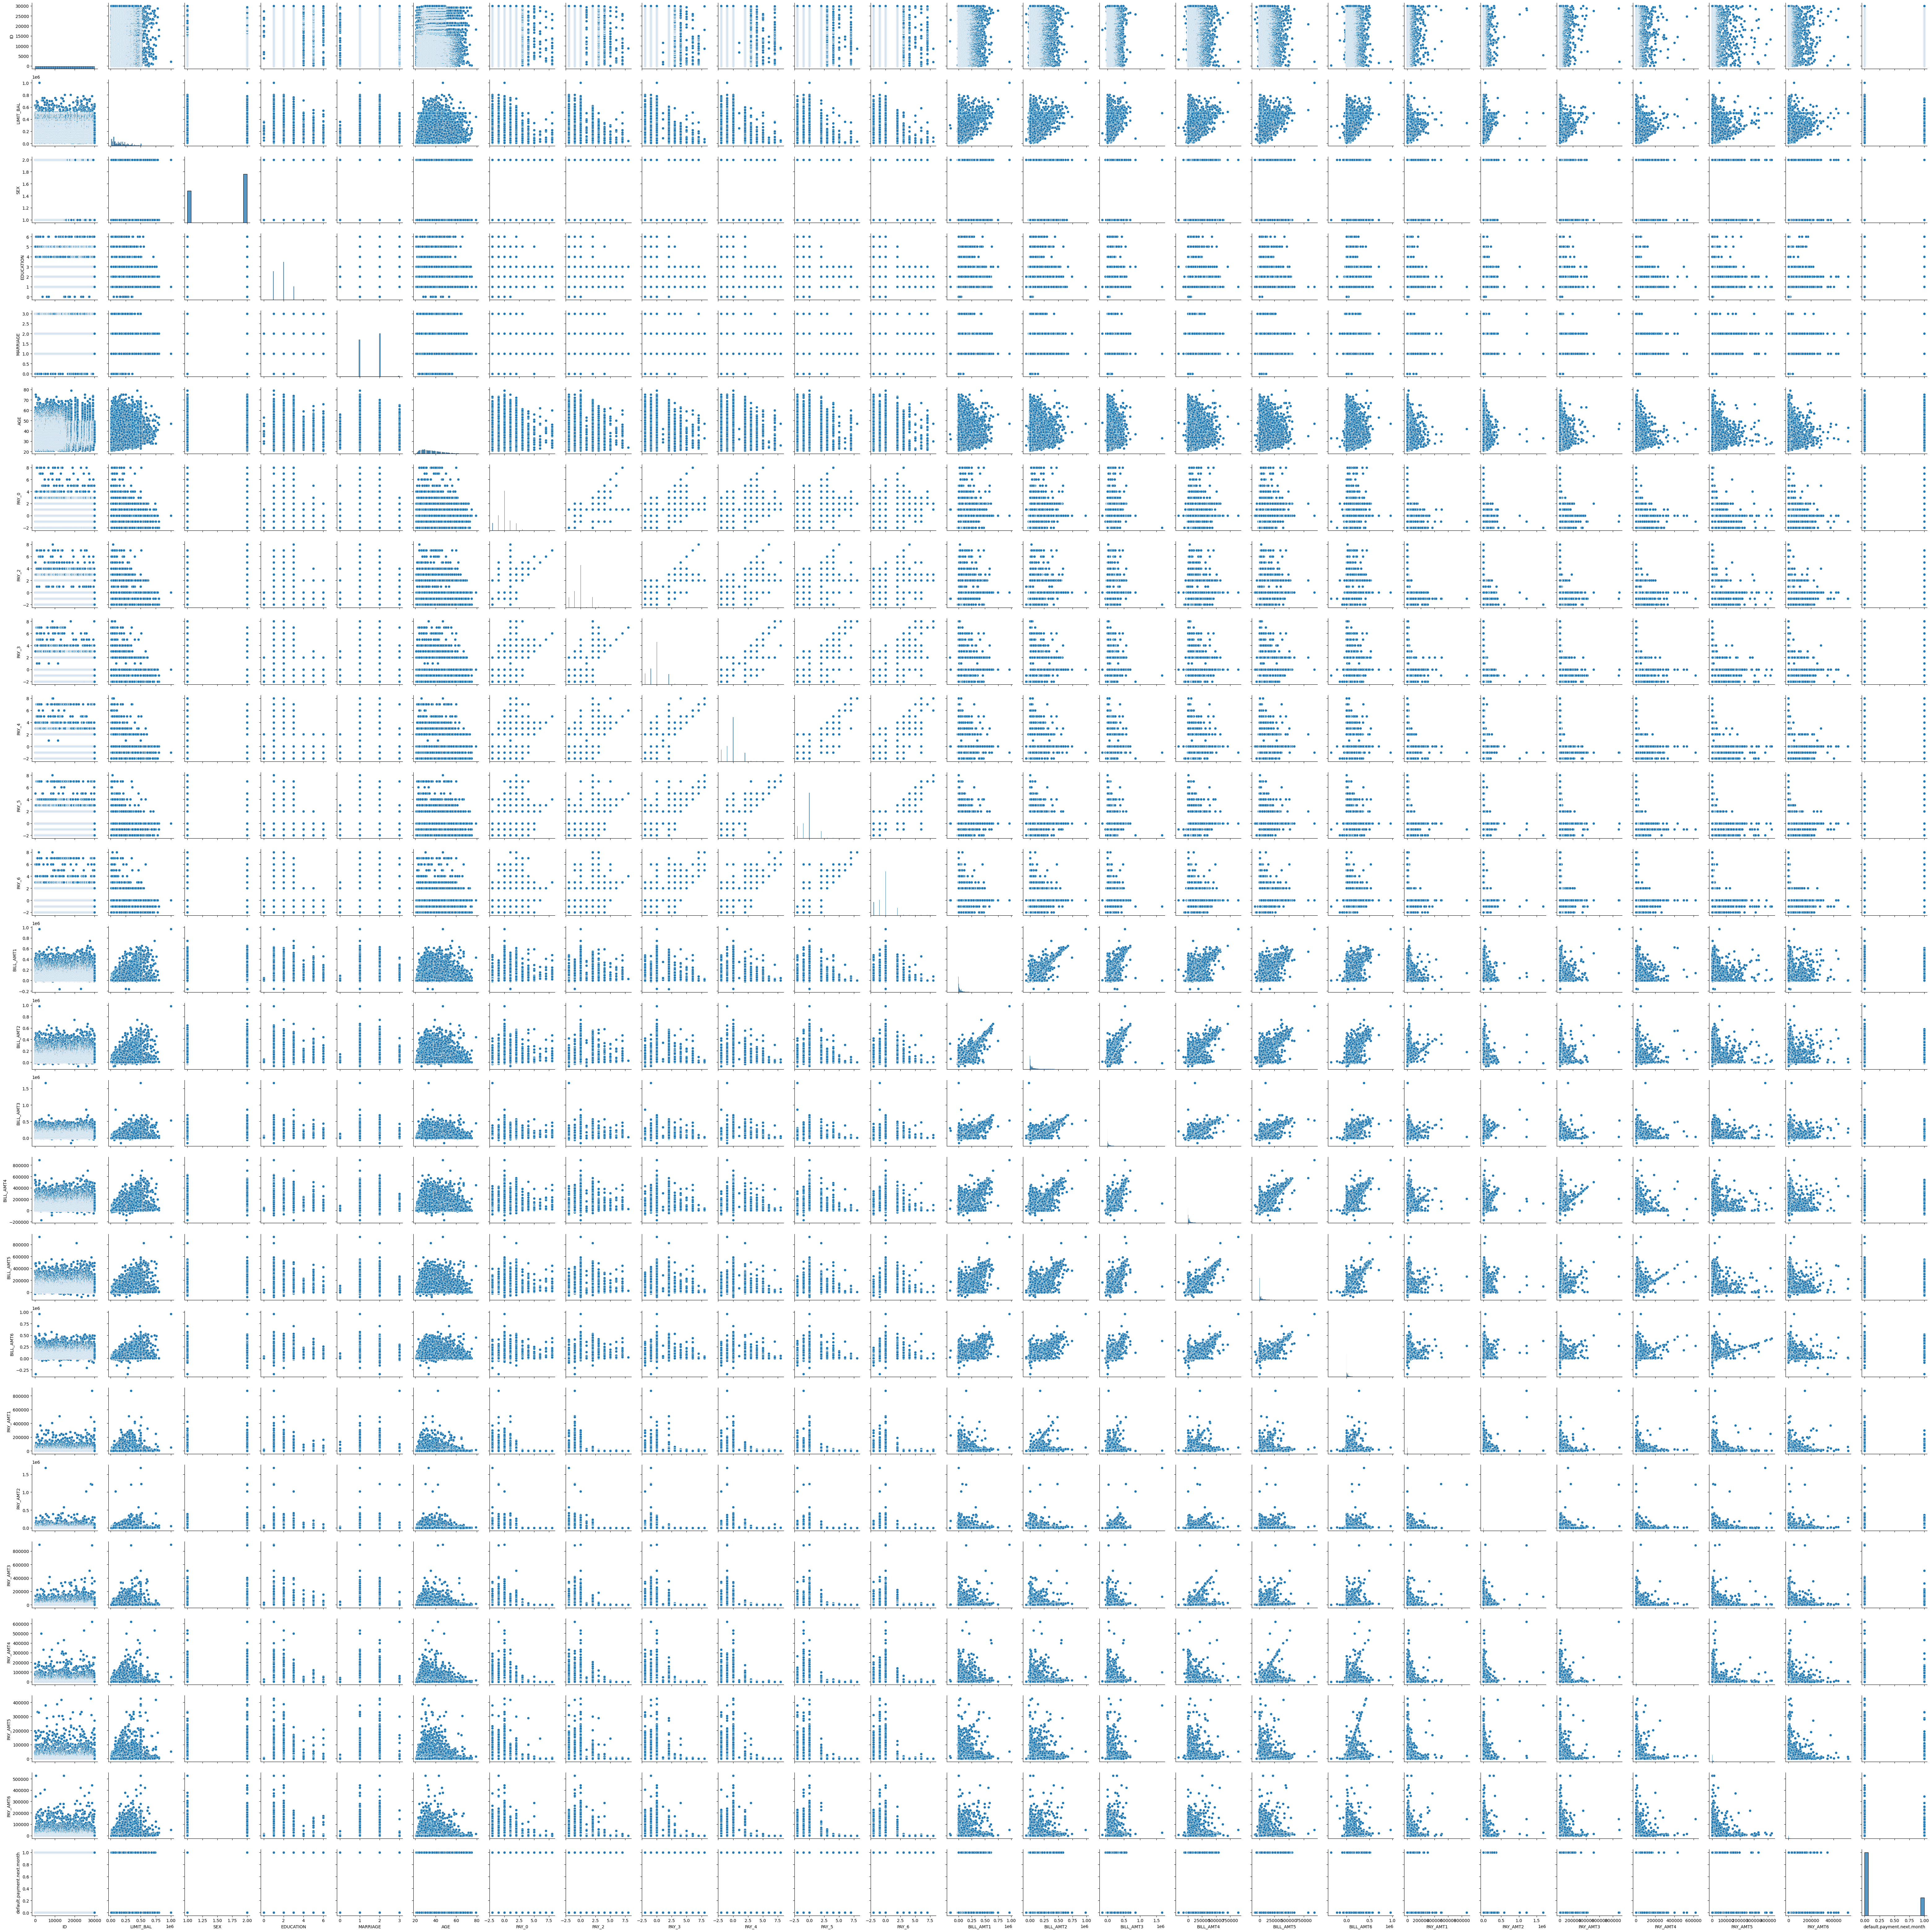

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
X = df.drop(['default.payment.next.month'],axis=1)
y = df['default.payment.next.month']

In [10]:
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

In [11]:
rs = RandomUnderSampler()
Xrs, yrs = rs.fit_resample(X,y)
yrs.value_counts()

default.payment.next.month
0    6636
1    6636
Name: count, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Xrs, yrs, test_size= 0.2, random_state=42)

In [13]:
svc = SVC()
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)

print(f"{classification_report(y_test, ypred)}")

              precision    recall  f1-score   support

           0       0.62      0.54      0.58      1324
           1       0.59      0.68      0.63      1331

    accuracy                           0.61      2655
   macro avg       0.61      0.61      0.61      2655
weighted avg       0.61      0.61      0.61      2655



In [14]:
# Feature scaling
x_scaler = StandardScaler()
X_train_scale = x_scaler.fit_transform(X_train)
X_test_scale = x_scaler.transform(X_test)


In [15]:
svc = SVC()
svc.fit(X_train_scale, y_train)
ypred = svc.predict(X_test_scale)

print(f"{classification_report(y_test, ypred)}")

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1324
           1       0.77      0.56      0.64      1331

    accuracy                           0.69      2655
   macro avg       0.71      0.69      0.69      2655
weighted avg       0.71      0.69      0.69      2655



In [16]:
pargrid = {
    'C' : [0.001, 0.01, 0.1, 1, 10],
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma' : ['scale', 'auto']
}

In [17]:
svc = SVC()
gscv = GridSearchCV(svc, param_grid=pargrid, cv=5)
gscv.fit(X_train_scale, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [18]:
gscv.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [19]:
svc = SVC(C=1, gamma='scale')
svc.fit(X_train_scale, y_train)
ypred = svc.predict(X_test_scale)

print(f"{classification_report(y_test, ypred)}")

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1324
           1       0.77      0.56      0.64      1331

    accuracy                           0.69      2655
   macro avg       0.71      0.69      0.69      2655
weighted avg       0.71      0.69      0.69      2655



In [20]:
pargrid = {
    'C' : [0.001, 0.01, 0.1, 1, 10],
    'kernel' : ['sigmoid', 'rbf'],
    'gamma' : ['scale', 'auto']
}

In [21]:
svc = SVC()
gscv = GridSearchCV(svc, param_grid=pargrid, cv=5)
gscv.fit(X_train_scale, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['sigmoid', 'rbf']})

In [22]:
gscv.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [23]:
pargrid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
}

In [24]:
svc = SVC()
gscv = GridSearchCV(svc, param_grid=pargrid, cv=5)
gscv.fit(X_train_scale, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [25]:
gscv.best_params_

{'C': 10, 'gamma': 0.01}

In [26]:
svc = SVC(C=10, gamma=0.01)
svc.fit(X_train_scale, y_train)
ypred = svc.predict(X_test_scale)

print(f"{classification_report(y_test, ypred)}")

              precision    recall  f1-score   support

           0       0.65      0.82      0.73      1324
           1       0.76      0.56      0.65      1331

    accuracy                           0.69      2655
   macro avg       0.71      0.69      0.69      2655
weighted avg       0.71      0.69      0.69      2655



In [27]:
X = df.drop(columns=["ID", "default.payment.next.month"])
y = df["default.payment.next.month"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [29]:
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter=2000,
        class_weight="balanced"
    ))
])

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))


Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000



In [30]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4673
           1       0.54      0.53      0.54      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.80      0.80      0.80      6000



In [31]:
knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=15))
])

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN")
print(classification_report(y_test, y_pred_knn))


KNN
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4673
           1       0.61      0.33      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.78      0.81      0.78      6000



In [32]:
svc_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(
        kernel="linear",
        class_weight="balanced"
    ))
])

svc_linear.fit(X_train, y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

print("SVC Linear")
print(classification_report(y_test, y_pred_svc_linear))


SVC Linear
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4673
           1       0.46      0.52      0.49      1327

    accuracy                           0.76      6000
   macro avg       0.66      0.67      0.67      6000
weighted avg       0.77      0.76      0.77      6000



In [33]:
param_grid_linear = {
    "svc__C": [0.01, 0.1, 1, 10, 100]
}

grid_linear = GridSearchCV(
    svc_linear,
    param_grid_linear,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid_linear.fit(X_train, y_train)

best_linear_svc = grid_linear.best_estimator_
print("Best C:", grid_linear.best_params_)


Best C: {'svc__C': 0.01}


In [34]:
y_pred_linear_tuned = best_linear_svc.predict(X_test)

print("SVC Linear (Tuned)")
print(classification_report(y_test, y_pred_linear_tuned))


SVC Linear (Tuned)
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4673
           1       0.46      0.52      0.49      1327

    accuracy                           0.76      6000
   macro avg       0.66      0.67      0.67      6000
weighted avg       0.77      0.76      0.77      6000



In [35]:
svc_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(
        kernel="rbf",
        class_weight="balanced"
    ))
])

param_grid_rbf = {
    "svc__C": [0.1, 1, 10],
    "svc__gamma": ["scale", 0.01, 0.1, 1]
}

grid_rbf = GridSearchCV(
    svc_rbf,
    param_grid_rbf,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid_rbf.fit(X_train, y_train)

best_rbf_svc = grid_rbf.best_estimator_
print("Best Params:", grid_rbf.best_params_)


Best Params: {'svc__C': 1, 'svc__gamma': 'scale'}


In [36]:
y_pred_rbf = best_rbf_svc.predict(X_test)

print("SVC RBF (Tuned)")
print(classification_report(y_test, y_pred_rbf))


SVC RBF (Tuned)
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4673
           1       0.49      0.56      0.53      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000

